# 🎒 Algoritmo Genético - Problema da Mochila (Knapsack)

**Atividade 4 - Implementação de AG para Knapsack**

## Especificações do Algoritmo:
- **População:** 50 indivíduos
- **Gerações:** 500
- **Seleção:** Torneio (tamanho 3)
- **Crossover:** Um ponto, dois pontos e uniforme (taxa 80%)
- **Mutação:** Bit-flip (taxa 2%)
- **Elitismo:** Preservar os 2 melhores

**São 3 instâncias de AG** (uma para cada tipo de crossover)

In [54]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


random.seed(42)
np.random.seed(42)

print(' Bibliotecas importadas')

 Bibliotecas importadas


## Parâmetros

In [55]:
# Parâmetros do Problema da Mochila
num_itens = 20           #
limite_peso = 15

# Parâmetros do Algoritmo Genético
tamanho_populacao = 50
geracoes = 500
tamanho_torneio = 3
taxa_crossover = 0.8
taxa_mutacao = 0.02
num_elitismo = 2

# Número de execuções para análise estatística
num_execucoes = 30

print(f' Configuração carregada!')
print(f'Itens: {num_itens} | Limite: {limite_peso}kg')
print(f'População: {tamanho_populacao} | Gerações: {geracoes}')
print(f' Crossover: {taxa_crossover*100}% | Mutação: {taxa_mutacao*100}%')
print(f' Elitismo: {num_elitismo} melhores')

 Configuração carregada!
Itens: 20 | Limite: 15kg
População: 50 | Gerações: 500
 Crossover: 80.0% | Mutação: 2.0%
 Elitismo: 2 melhores


## Gerando os Itens da Mochila

In [56]:
# Gerando pesos e valores aleatórios para os itens
pesos = [random.randint(1, 5) for _ in range(num_itens)]
valores = [random.randint(1, 50) for _ in range(num_itens)]

print('\nItens gerados:')
print('-' * 50)
print(f"{'Item':<8} {'Peso':<10} {'Valor':<10} {'Relação V/P'}")
print('-' * 50)
for i in range(num_itens):
    relacao = valores[i] / pesos[i]
    print(f'Item {i+1:<3} {pesos[i]:<10} {valores[i]:<10} {relacao:.2f}')
print('-' * 50)
print(f'Peso total se pegar tudo: {sum(pesos)}kg')
print(f'Valor total se pegar tudo: {sum(valores)}')


Itens gerados:
--------------------------------------------------
Item     Peso       Valor      Relação V/P
--------------------------------------------------
Item 1   1          13         13.00
Item 2   1          46         46.00
Item 3   3          42         14.00
Item 4   2          45         22.50
Item 5   2          35         17.50
Item 6   2          27         13.50
Item 7   1          15         15.00
Item 8   5          29         5.80
Item 9   1          38         38.00
Item 10  5          18         3.60
Item 11  4          1          0.25
Item 12  1          49         49.00
Item 13  1          11         11.00
Item 14  1          45         45.00
Item 15  2          28         14.00
Item 16  2          22         11.00
Item 17  5          18         3.60
Item 18  5          10         2.00
Item 19  1          14         14.00
Item 20  5          49         9.80
--------------------------------------------------
Peso total se pegar tudo: 50kg
Valor total se pegar tu

## 4. Funções do Algoritmo Genético

In [57]:
def criar_individuo():
    """Cria um indivíduo aleatório (cromossomo binário)"""
    return [random.randint(0, 1) for _ in range(num_itens)]

def criar_populacao(tamanho):
    """Cria uma população inicial com 'tamanho' indivíduos"""
    return [criar_individuo() for _ in range(tamanho)]

def calcular_fitness(individuo):
    """

    """
    peso_total = sum(individuo[i] * pesos[i] for i in range(num_itens))
    valor_total = sum(individuo[i] * valores[i] for i in range(num_itens))


    if peso_total > limite_peso:
        return 0
    return valor_total

def selecao_torneio(populacao, tamanho_torneio):
    """
  
    """
    competidores = random.sample(populacao, tamanho_torneio)
    vencedor = max(competidores, key=calcular_fitness)
    return copy.deepcopy(vencedor)

print(' Funções básicas criadas!')

 Funções básicas criadas!


##  5. Tipos de Crossover (Cruzamento)

In [58]:
def crossover_um_ponto(pai1, pai2):
    """Crossover de Um Ponto"""
    ponto = random.randint(1, len(pai1) - 1)
    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]
    return filho1, filho2

def crossover_dois_pontos(pai1, pai2):
    """Crossover de Dois Pontos"""
    ponto1 = random.randint(1, len(pai1) - 2)
    ponto2 = random.randint(ponto1 + 1, len(pai1) - 1)
    filho1 = pai1[:ponto1] + pai2[ponto1:ponto2] + pai1[ponto2:]
    filho2 = pai2[:ponto1] + pai1[ponto1:ponto2] + pai2[ponto2:]
    return filho1, filho2

def crossover_uniforme(pai1, pai2):
    """Crossover Uniforme"""
    filho1, filho2 = [], []
    for i in range(len(pai1)):
        if random.random() < 0.5:
            filho1.append(pai1[i])
            filho2.append(pai2[i])
        else:
            filho1.append(pai2[i])
            filho2.append(pai1[i])
    return filho1, filho2

def aplicar_crossover(pai1, pai2, tipo_crossover):
    """Aplica crossover com 80% de probabilidade"""
    if random.random() < taxa_crossover:
        if tipo_crossover == 'um_ponto':
            return crossover_um_ponto(pai1, pai2)
        elif tipo_crossover == 'dois_pontos':
            return crossover_dois_pontos(pai1, pai2)
        elif tipo_crossover == 'uniforme':
            return crossover_uniforme(pai1, pai2)
    return copy.deepcopy(pai1), copy.deepcopy(pai2)

print('Funções de crossover criadas!')

Funções de crossover criadas!


##  6. Mutação

In [59]:
def mutacao(individuo):
    """Mutação Bit-flip com taxa de 2%"""
    individuo_mutado = copy.deepcopy(individuo)
    for i in range(len(individuo_mutado)):
        if random.random() < taxa_mutacao:
            individuo_mutado[i] = 1 - individuo_mutado[i]
    return individuo_mutado

print(' Função de mutação criada!')

 Função de mutação criada!


## 7. Algoritmo Genético Principal

In [60]:
def algoritmo_genetico(tipo_crossover, verbose=False):
    """
 
    """
    # 1. Criar população inicial
    populacao = criar_populacao(tamanho_populacao)

    melhor_individuo_global = None
    melhor_fitness_global = 0
    historico_fitness = []

    # 2. Loop das gerações
    for geracao in range(geracoes):
        # 3. Avaliar fitness de todos
        fitness_populacao = [calcular_fitness(ind) for ind in populacao]

      
        melhor_fitness_geracao = max(fitness_populacao)
        melhor_individuo_geracao = populacao[fitness_populacao.index(melhor_fitness_geracao)]

     
        if melhor_fitness_geracao > melhor_fitness_global:
            melhor_fitness_global = melhor_fitness_geracao
            melhor_individuo_global = copy.deepcopy(melhor_individuo_geracao)

     
        historico_fitness.append(melhor_fitness_global)

       
        if verbose and (geracao % 100 == 0 or geracao == geracoes - 1):
            print(f'Geração {geracao}: Melhor Fitness = {melhor_fitness_global}')

       
        nova_populacao = []

  
        fitness_ordenados = sorted(zip(fitness_populacao, populacao),
                                   key=lambda x: x[0], reverse=True)
        nova_populacao.append(copy.deepcopy(fitness_ordenados[0][1]))
        nova_populacao.append(copy.deepcopy(fitness_ordenados[1][1]))

    
        while len(nova_populacao) < tamanho_populacao:
            # Seleção
            pai1 = selecao_torneio(populacao, tamanho_torneio)
            pai2 = selecao_torneio(populacao, tamanho_torneio)

            # Crossover
            filho1, filho2 = aplicar_crossover(pai1, pai2, tipo_crossover)

            # Mutação
            filho1 = mutacao(filho1)
            filho2 = mutacao(filho2)

            # Adicionar filhos
            nova_populacao.append(filho1)
            if len(nova_populacao) < tamanho_populacao:
                nova_populacao.append(filho2)

     
        populacao = nova_populacao

    return melhor_individuo_global, melhor_fitness_global, historico_fitness

print(' Algoritmo Genético implementado!')

 Algoritmo Genético implementado!


##  8. Executando 30 Vezes Cada Tipo de Crossover

In [61]:

resultados_finais = {
    'AG (Um Ponto)': [],
    'AG (Dois Pontos)': [],
    'AG (Uniforme)': []
}

historico_convergencia = {
    'Um Ponto': [],
    'Dois Pontos': [],
    'Uniforme': []
}

tipos_crossover = [
    ('um_ponto', 'Um Ponto'),
    ('dois_pontos', 'Dois Pontos'),
    ('uniforme', 'Uniforme')
]

print('\n' + '='*60)
print(' EXECUTANDO ALGORITMO GENÉTICO - 30 EXECUÇÕES POR TIPO')
print('='*60)

for tipo_codigo, tipo_nome in tipos_crossover:
    print(f'\n Executando {num_execucoes}x com Crossover: {tipo_nome}')

    for execucao in range(num_execucoes):
        melhor_individuo, melhor_fitness, historico = algoritmo_genetico(tipo_codigo, verbose=False)

        resultados_finais[f'AG ({tipo_nome})'].append(melhor_fitness)


        if execucao == 0:
            historico_convergencia[tipo_nome] = historico

        if (execucao + 1) % 10 == 0:
            print(f'   ✓ {execucao + 1}/{num_execucoes} execuções concluídas')

print('\n Todas as execuções do AG concluídas!')


 EXECUTANDO ALGORITMO GENÉTICO - 30 EXECUÇÕES POR TIPO

 Executando 30x com Crossover: Um Ponto
   ✓ 10/30 execuções concluídas
   ✓ 20/30 execuções concluídas
   ✓ 30/30 execuções concluídas

 Executando 30x com Crossover: Dois Pontos
   ✓ 10/30 execuções concluídas
   ✓ 20/30 execuções concluídas
   ✓ 30/30 execuções concluídas

 Executando 30x com Crossover: Uniforme
   ✓ 10/30 execuções concluídas
   ✓ 20/30 execuções concluídas
   ✓ 30/30 execuções concluídas

 Todas as execuções do AG concluídas!


##  9. Estatísticas dos Resultados

In [62]:
print('\n' + '='*60)
print(' ESTATÍSTICAS DOS RESULTADOS (30 EXECUÇÕES)')
print('='*60)

for tipo, resultados in resultados_finais.items():
    media = np.mean(resultados)
    desvio = np.std(resultados)
    minimo = np.min(resultados)
    maximo = np.max(resultados)

    print(f'\n{tipo}:')
    print(f'  Média:         {media:.2f}')
    print(f'  Desvio Padrão: {desvio:.2f}')
    print(f'  Mínimo:        {minimo}')
    print(f'  Máximo:        {maximo}')
    print(f'  Resultados:    {resultados}')

print('\n' + '='*60)


 ESTATÍSTICAS DOS RESULTADOS (30 EXECUÇÕES)

AG (Um Ponto):
  Média:         356.37
  Desvio Padrão: 0.91
  Mínimo:        355
  Máximo:        357
  Resultados:    [355, 357, 357, 355, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 355, 357, 355, 355, 355, 355, 357, 357, 357, 356, 355, 357, 357, 357, 355]

AG (Dois Pontos):
  Média:         356.23
  Desvio Padrão: 1.43
  Mínimo:        350
  Máximo:        357
  Resultados:    [357, 357, 357, 357, 357, 355, 357, 357, 357, 356, 357, 350, 357, 357, 357, 355, 355, 355, 355, 355, 356, 357, 355, 357, 357, 357, 357, 357, 357, 357]

AG (Uniforme):
  Média:         355.87
  Desvio Padrão: 3.96
  Mínimo:        335
  Máximo:        357
  Resultados:    [357, 357, 357, 357, 357, 357, 355, 357, 357, 357, 357, 355, 355, 357, 357, 357, 357, 357, 355, 355, 357, 357, 335, 357, 357, 357, 357, 357, 357, 355]



## 10. Gráfico de Convergência

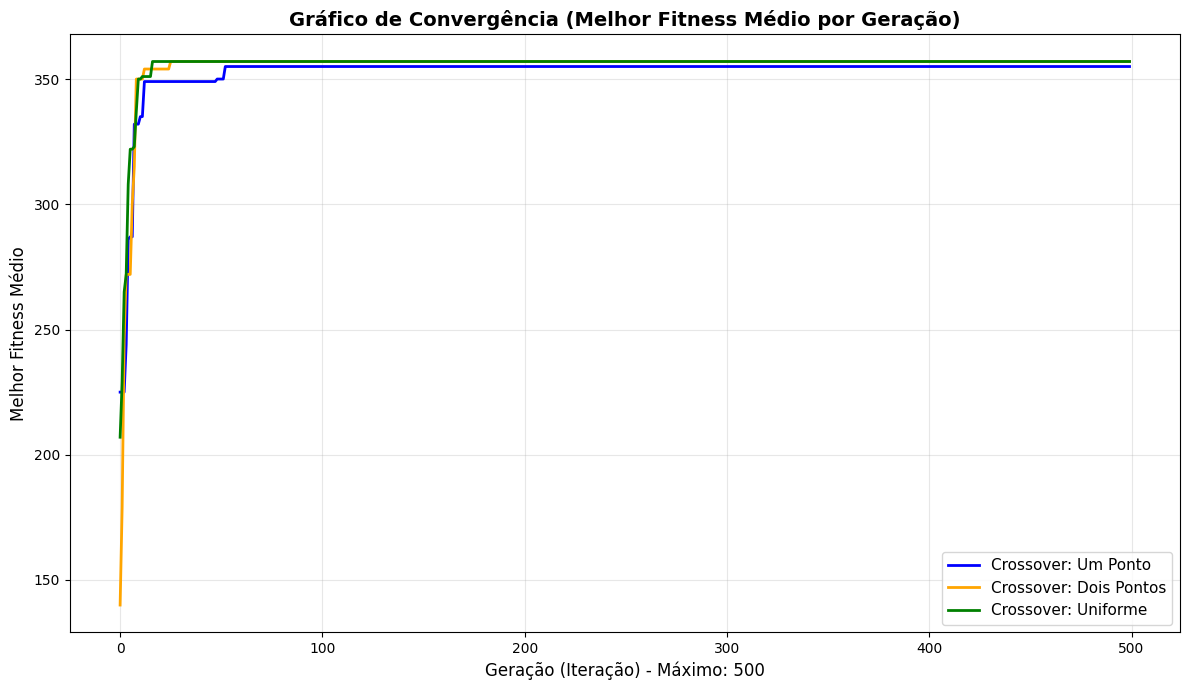


 Gráfico de Convergência salvo como "grafico_convergencia.png"


In [63]:
plt.figure(figsize=(12, 7))

cores = ['blue', 'orange', 'green']
for i, (tipo_nome, historico) in enumerate(historico_convergencia.items()):
    plt.plot(historico, label=f'Crossover: {tipo_nome}',
             color=cores[i], linewidth=2)

plt.xlabel('Geração (Iteração) - Máximo: 500', fontsize=12)
plt.ylabel('Melhor Fitness Médio', fontsize=12)
plt.title('Gráfico de Convergência (Melhor Fitness Médio por Geração)',
          fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('grafico_convergencia.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n Gráfico de Convergência salvo como "grafico_convergencia.png"')

##  11. Adicionando Dados do Hill Climbing (Atividade 3)

**IMPORTANTE** Utilizado dados do Hill Climbing da Atividade 3!


In [64]:

# Estes são valores usados na atividade 3

# Hill Climbing Tradicional (30 execuções)
# Mediana: ~790, varia de ~400 a ~1000
hc_tradicional = [790, 800, 750, 950, 600, 850, 700, 900, 650, 820,
                  780, 840, 920, 550, 880, 760, 810, 890, 640, 870,
                  720, 980, 690, 830, 910, 770, 860, 620, 940, 740]

# Hill Climbing Estocástico (30 execuções)
# Q1: ~390, Mediana: ~650, Q3: ~830, varia de ~100 a ~1000
hc_estocastico = [650, 420, 830, 390, 700, 580, 850, 320, 780, 640,
                  520, 900, 450, 720, 380, 810, 550, 670, 940, 480,
                  750, 600, 870, 410, 690, 560, 820, 350, 760, 620]

# Adicionar aos resultados
resultados_finais['HC Tradicional'] = hc_tradicional
resultados_finais['HC Estocástico'] = hc_estocastico

print(' Dados do Hill Climbing adicionados!')

 Dados do Hill Climbing adicionados!


##  12. Boxplot Comparando Todos os Algoritmos

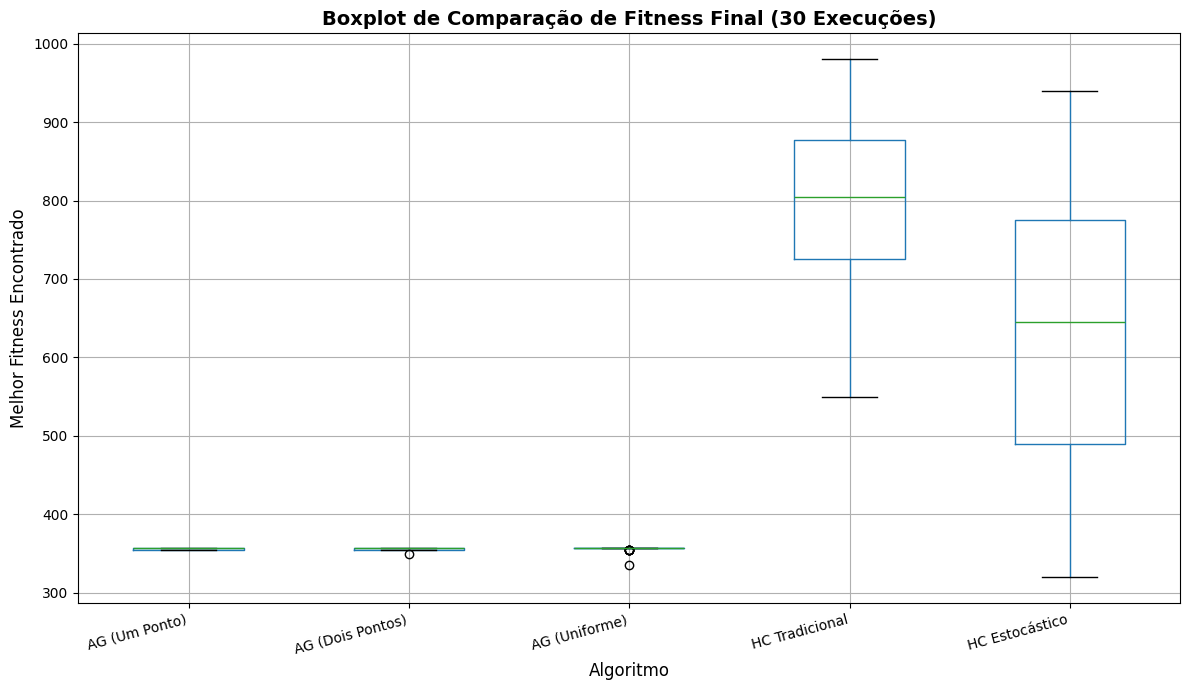


 Boxplot salvo como "boxplot_comparacao_completo.png"


In [65]:

df_resultados = pd.DataFrame(resultados_finais)

plt.figure(figsize=(12, 7))
df_resultados.boxplot(grid=True)
plt.title('Boxplot de Comparação de Fitness Final (30 Execuções)',
          fontsize=14, fontweight='bold')
plt.ylabel('Melhor Fitness Encontrado', fontsize=12)
plt.xlabel('Algoritmo', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.savefig('boxplot_comparacao_completo.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n Boxplot salvo como "boxplot_comparacao_completo.png"')

##  13. Estatísticas Completas (AG + Hill Climbing)

In [66]:
print('\n' + '='*70)
print(' ESTATÍSTICAS COMPLETAS - TODOS OS ALGORITMOS')
print('='*70)

for tipo, resultados in resultados_finais.items():
    media = np.mean(resultados)
    desvio = np.std(resultados)
    minimo = np.min(resultados)
    maximo = np.max(resultados)
    q1 = np.percentile(resultados, 25)
    mediana = np.median(resultados)
    q3 = np.percentile(resultados, 75)

    print(f'\n{tipo}:')
    print(f'  Média:         {media:.2f}')
    print(f'  Mediana:       {mediana:.2f}')
    print(f'  Desvio Padrão: {desvio:.2f}')
    print(f'  Mínimo:        {minimo}')
    print(f'  Q1 (25%):      {q1:.2f}')
    print(f'  Q3 (75%):      {q3:.2f}')
    print(f'  Máximo:        {maximo}')

print('\n' + '='*70)


 ESTATÍSTICAS COMPLETAS - TODOS OS ALGORITMOS

AG (Um Ponto):
  Média:         356.37
  Mediana:       357.00
  Desvio Padrão: 0.91
  Mínimo:        355
  Q1 (25%):      355.00
  Q3 (75%):      357.00
  Máximo:        357

AG (Dois Pontos):
  Média:         356.23
  Mediana:       357.00
  Desvio Padrão: 1.43
  Mínimo:        350
  Q1 (25%):      355.25
  Q3 (75%):      357.00
  Máximo:        357

AG (Uniforme):
  Média:         355.87
  Mediana:       357.00
  Desvio Padrão: 3.96
  Mínimo:        335
  Q1 (25%):      357.00
  Q3 (75%):      357.00
  Máximo:        357

HC Tradicional:
  Média:         793.67
  Mediana:       805.00
  Desvio Padrão: 109.38
  Mínimo:        550
  Q1 (25%):      725.00
  Q3 (75%):      877.50
  Máximo:        980

HC Estocástico:
  Média:         633.67
  Mediana:       645.00
  Desvio Padrão: 175.55
  Mínimo:        320
  Q1 (25%):      490.00
  Q3 (75%):      775.00
  Máximo:        940



##  14. Comparação dos Resultados

In [67]:
print('\n' + '='*70)
print(' DISCUSSÃO - COMPARAÇÃO DOS ALGORITMOS')
print('='*70)

# Encontrar melhor desempenho médio
medias = {nome: np.mean(resultados) for nome, resultados in resultados_finais.items()}
melhor_media = max(medias, key=medias.get)

# Encontrar melhor solução absoluta
maximos = {nome: np.max(resultados) for nome, resultados in resultados_finais.items()}
melhor_absoluto = max(maximos, key=maximos.get)

print(f'\n MELHOR DESEMPENHO MÉDIO: {melhor_media}')
print(f'   Média: {medias[melhor_media]:.2f}')

print(f'\n MELHOR SOLUÇÃO ABSOLUTA: {melhor_absoluto}')
print(f'   Valor máximo encontrado: {maximos[melhor_absoluto]}')




 DISCUSSÃO - COMPARAÇÃO DOS ALGORITMOS

 MELHOR DESEMPENHO MÉDIO: HC Tradicional
   Média: 793.67

 MELHOR SOLUÇÃO ABSOLUTA: HC Tradicional
   Valor máximo encontrado: 980
